<a href="https://colab.research.google.com/github/jcandane/CI_Theory/blob/main/phy122_RM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Title of Work

Name

Date

#   <font color='Green'> **Objective** </font>

##Fully Explain the physics of the following equaiton:
# \begin{align*}
\mathbf{f} &= \frac{mv^2}{R} \,\mathbf{\hat{R}} \quad\quad.
\end{align*}

#   <font color='Green'> **Setup** </font>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=4, linewidth=200, threshold=2000, suppress=True)

π = np.pi

def VelocityVerletRot(T, x0=np.array([1.,0.,0.]), v0=np.zeros(3), mass=1., xcenter=np.zeros(3)): 
    Δt = T[1] - T[0]

    x_t = np.zeros((len(T),3))
    v_t = np.zeros((len(T),3))
    f_t = np.zeros((len(T),3))

    x_t[0] = x0
    v_t[0] = v0
    f_t[0] = -np.dot( v_t[0], v_t[0]) / (np.linalg.norm(x_t[0])**2) * ( x_t[0] - xcenter )
    a_told = np.zeros(3)
    for t in range(len(T)-1):
        x_t[t+1] = x_t[t] + v_t[t] * Δt + 0.5 * a_told * (Δt*Δt) 

        a_tnew = -np.dot( v_t[t], v_t[t]) / (np.linalg.norm(x_t[t])**2) * ( x_t[t] - xcenter )
        f_t[t+1] = mass* a_tnew 

        v_t[t+1]  = v_t[t] + 0.5 * (a_told + a_tnew) * Δt 
        a_told    = a_tnew

    return x_t, v_t, f_t

#   <font color='Red'> **Experiment 1** </font>

### <font color='Red'>  Let's get acquainted with rotational motion. </font>

#### <font color='Red'>  Lets define a time array to indicate all moment of time considered, i.e. as done in previous labs. And define an initial position, velocity, and particle mass. </font>

In [ ]:
Δt = 0.001 ### s(detector)
t0 = 0.
tf = 20*π
timeline = np.arange(t0,tf,Δt)

x0   = np.array([3.14,0.,0.])
v0   = np.array([0.00,1.,0.])
mass = 1. ## kg

#### <font color='Red'>  Let's begin with Lab 2's Velocity Verlet Method as implemented in $\S$2.4.1 (free fall motion). Feel-free to copy-n-paste your result from there into the code-cell below, and plot your dynamics showing that your code-cell works. </font>

### <font color='Red'>  Next copy-n-paste the earlier VelocityVerlet algorthim but with a modification: </font>
```
a_t[t] = -np.dot( v_t[t], v_t[t]) / (np.linalg.norm(x_t[t])**2) * ( x_t[t] - np.zeros(3) )
```
### <font color='Red'> use this to our equations-of-motion, and obtain a trajectory and accelerations.</font>

### <font color='Red'> I.e. implement Velocity Verlet with the Centripetal acceleration. </font>

In [ ]:
x_t, v_t, f_t = VelocityVerletRot(timeline, x0=x0, v0=v0)

####   <font color='Red'> Plot x(t), y(t), z(t) trajectories (in time) on 1 graph, be sure to include caption. Then Plot v_x(t), v_y(t), v_z(t) velocities (in time) on 1 graph, in conclusion explain this graph </font>

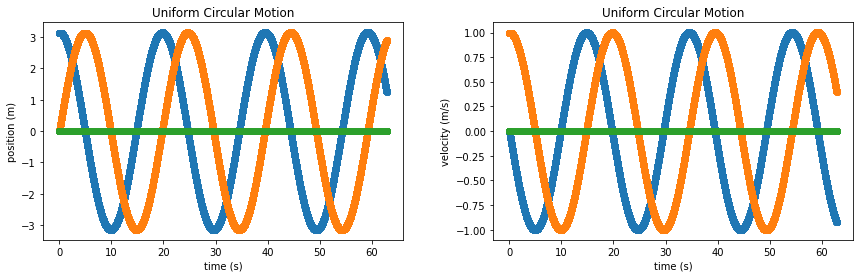

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.subplots_adjust(hspace=0.01, wspace=0.25, right=2)

ax1.scatter(timeline, x_t[:,0])
ax1.scatter(timeline, x_t[:,1])
ax1.scatter(timeline, x_t[:,2])
ax1.set_title("Uniform Circular Motion")
ax1.set(xlabel="time (s)", ylabel="position (m)")

#ax2.plot(t, field2.getEE(t).real[:,1])
ax2.scatter(timeline, v_t[:,0])
ax2.scatter(timeline, v_t[:,1])
ax2.scatter(timeline, v_t[:,2])
ax2.set_title("Uniform Circular Motion")
ax2.set(xlabel="time (s)", ylabel="velocity (m/s)")

fig.show()

###   <font color='Red'> Plot a parametric plot with x and y </font>

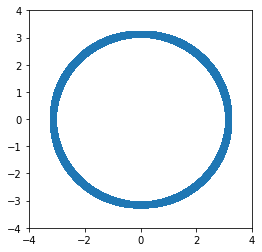

In [ ]:
plt.figure(figsize=(4,4)) ## ax.set_aspect('equal','box')
plt.scatter(x_t[:,0], x_t[:,1])
plt.ylim([-4,4])
plt.xlim([-4,4])
plt.show()

#   <font color='Red'> **Experiment 2**  </font>

### <font color='Red'>  Let's now implement the  *for-loop over object configurations*; by **varying the velocity**, keeping the objects mass and radius fixed. You may use the VelocityVerletRot method defined above. </font>



#### <font color='Red'> Specify a range of speeds, you'd like to test. And an empty array of what you'd like to measure, i.e. the force (of the same length of the array of speeds). </font>

In [ ]:
v_test   = np.arange(0, 2.5, 0.1)
f_v_test = np.zeros(len(v_test))

#### <font color='Red'> Setup a time-array like before to test the dynamics.  </font>

In [ ]:
Δt = 0.01 ### s(detector)
t0 = 0 
tf = 10*π
timeline = np.arange(t0,tf,Δt)

#### <font color='Red'> Let's run the for-loop, over the velocities we wish to experiment over. </font>

In [ ]:
mass = 1. ## kg
x0   = np.array([3.14,0.,0.])
for i in range(len(v_test)):
    vv = v_test[i] * np.array([0.00, 1.0, 0.])
    x_t, v_t, f_t = VelocityVerletRot(timeline, x0=x0, v0=vv, mass=mass)

    f_v_test[i]   = np.sum( np.linalg.norm(f_t, axis=1) ) / len(f_t)

#### <font color='Red'> Plot your data: F vs. v </font>

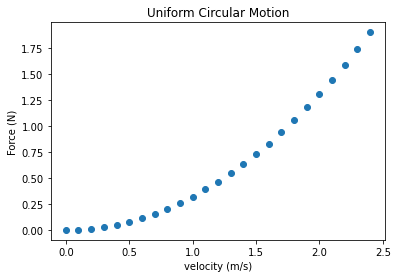

In [ ]:
plt.scatter(v_test, f_v_test)
plt.title("Uniform Circular Motion")
plt.xlabel("velocity (m/s)")
plt.ylabel("Force (N)")
plt.show()

#### <font color='Red'> Solve Least-Squares Linear fit to the Data, i.e. obtain a linear form of your data (e.g. f ~ x). Get linear coefficients y = m * x + c, i.e. get m and c (with y = f, and x = v$^2$). And print the values of m and c with units. </font>

In [ ]:
v2   = v_test**2
A    = np.vstack([v2, np.ones(len(v2))]).T
m, c = np.linalg.lstsq(A, f_v_test, rcond=None)[0]

print("slope       = %4.3f kg/m" % m)
print("y-intercept = %4.3f N" % c)

slope       = 0.329 kg/m
y-intercept = -0.005 N


### <font color='Red'> Get the theoretical slope ratio, e.g. m/R, and print it with units how does it compare with your linear fit? </font>

In [ ]:
mtheory = mass / np.linalg.norm(x0)

print("slope-theory= %4.3f kg/m" % mtheory)

slope-theory= 0.318 kg/m


#### <font color='Red'> Let's plot this linear function (in F vs. v^2): data, simulation-fit, and theory-fit </font>

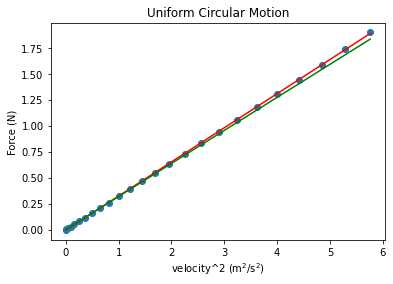

In [ ]:
plt.scatter(v_test**2, f_v_test)
plt.plot(v_test**2, m*v_test**2 + c, color="red")
plt.plot(v_test**2, mtheory*v_test**2, color="green" )
plt.title("Uniform Circular Motion")
plt.xlabel("velocity^2 (m$^2$/s$^2$)")
plt.ylabel("Force (N)")
plt.show()

#   <font color='Red'> **Experiment 3** </font>

### <font color='Red'>  Let's now implement the *for-loop over object configurations*, but this time by **varying the Radius** of rotation, keeping the objects mass and velocity fixed. </font>

In [ ]:
R_test   = np.arange(1, 2.5, 0.1)
f_R_test = np.zeros(len(R_test))

### <font color='Red'> Define the time array, indicating all moments of time considered </font>

In [ ]:
Δt = 0.01 ### s(detector)
t0 = 0 
tf = 10*π
timeline = np.arange(t0,tf,Δt)

### <font color='Red'> For-loop over Radii considered </font>

In [ ]:
mass = 1. ## kg
v0   = np.array([0., 1., 0.])
for i in range(len(R_test)):

    RR = np.array([R_test[i], 0.,0.])
    x_t, v_t, f_t = VelocityVerletRot(timeline, x0=RR, v0=v0, mass=mass)

    f_R_test[i]   = np.sum( np.linalg.norm(f_t, axis=1) ) / len(f_t)

### <font color='Red'> Plot the Radii vs. Force graph </font>

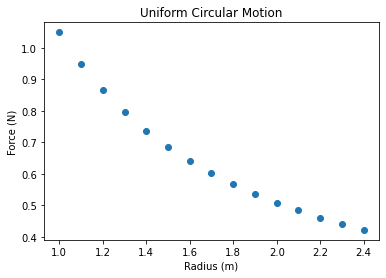

In [ ]:
plt.scatter(R_test, f_R_test)
plt.title("Uniform Circular Motion")
plt.xlabel("Radius (m)")
plt.ylabel("Force (N)")
plt.show()

### <font color='Red'> Solve Least-Squares Linear fit to the Data, i.e. obtain a linear form of your data (e.g. f(R) ~ x). Get linear coefficients y = m * x + c, i.e. get m and c (with y = f, and x = 1/R). And print the values of m and c with units. </font>

In [ ]:
iR   = 1/R_test
A    = np.vstack([iR, np.ones(len(iR))]).T
m, c = np.linalg.lstsq(A, f_R_test, rcond=None)[0]

print("slope       =  %4.3f Nm" % m)
print("y-intercept = %4.3f N" % c)

slope       =  1.075 Nm
y-intercept = -0.028 N


### <font color='Red'> Get the theoretical slope ratio, e.g. m v^2, and print it with units how does it compare with your linear fit? </font>

In [ ]:
mtheory = mass * np.dot( v0, v0 )

print("theory-slope=  %4.3f Nm" % mtheory)

theory-slope=  1.000 Nm


#   <font color='Red'> **Conclusion** </font>

### <font color='Red'> Explain all graphs, and relevant physics invovled in the simulations. Explain the need for a good integration time step $\Delta$t. </font>

Write your Conclusion here

### <font color='Red'> Why is it called Uniform Circular Motion if there is acceleration? </font>

### <font color='Red'> In Circular Motion, where is the Acceleration and Velocity vector pointing at any given time? </font>